In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
# Імпорт даних з файлу stores-dist.csv
salesDist = pd.read_csv('./Data/stores-dist.csv')
# Перевірка правильності імпорту
salesDist.head()


,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [49]:
# Перейменування назв стовпців для полегшення оброблення даних
salesDist = salesDist.rename(columns={
    'annual net sales': 'sales',
    'number of stores in district': 'stores'
})

# Перевіримо результат
salesDist.head()


,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [ ]:
# Перевірка кореляції між змінними
salesDist.corr()

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


In [51]:
# Видаляємо стовпець 'district', оскільки він має низьку кореляцію з іншими показниками

sales = salesDist.drop('district', axis=1)
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


In [52]:
# Призначаємо змінні для побудови графіку

y = sales['sales']     
x = sales['stores']    

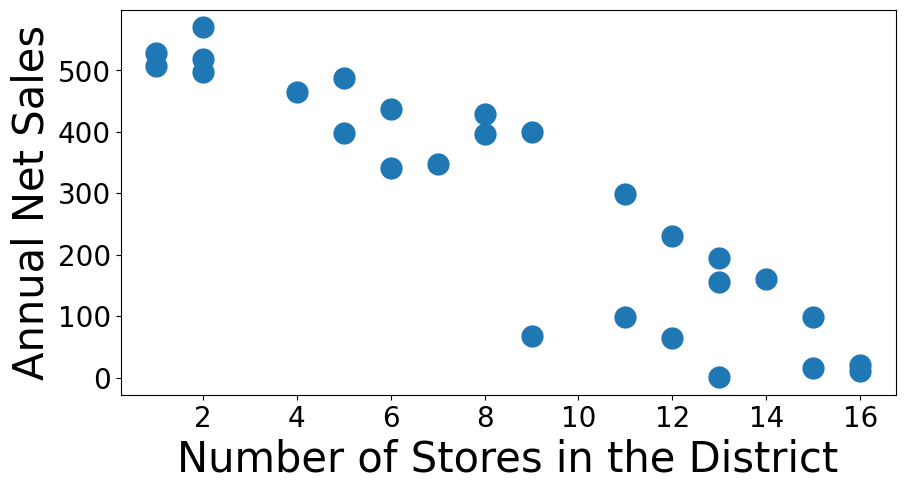

In [53]:
# Створення графіка розсіювання (scatter plot)

%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', markersize=15)

plt.ylabel('Annual Net Sales', fontsize=30)
plt.xlabel('Number of Stores in the District', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
# Обчислення нахилу та перетину Y-лінії лінійної регресії.

m, b = np.polyfit(x, y, 1)

print('Нахил прямої дорівнює {:.2f}.'.format(m))
print('Перетин з віссю y дорівнює {:.2f}.'.format(b))
print('Лінія простої лінійної регресії, що найкраще відповідає, дорівнює {:.2f}x + {:.2f}.'.format(m, b))

Нахил прямої дорівнює -35.79.
Перетин з віссю y дорівнює 599.38.
Лінія простої лінійної регресії, що найкраще відповідає, дорівнює -35.79x + 599.38.


In [55]:
# Обчислення центроїда (середніх значень)

y_mean = y.mean()
x_mean = x.mean()

print('Центроїд для цього набору даних x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

Центроїд для цього набору даних x = 8.74 and y = 286.57.


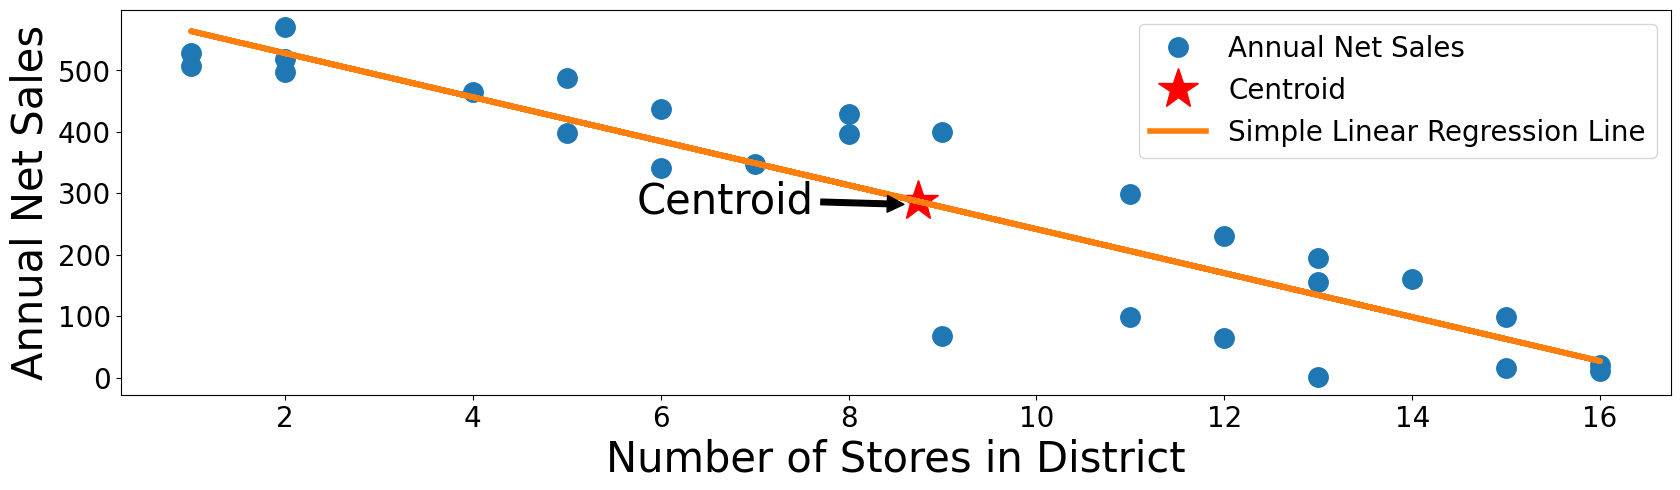

In [56]:
plt.figure(figsize=(20,5))

plt.plot(x, y, 'o', markersize=14, label="Annual Net Sales")
plt.plot(x_mean, y_mean, '*', markersize=30, color="r", label="Centroid")  # ← додано label
plt.plot(x, m*x + b, '-', label='Simple Linear Regression Line', linewidth=4)

plt.ylabel('Annual Net Sales', fontsize=30)
plt.xlabel('Number of Stores in District', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.annotate('Centroid', 
             xy=(x_mean-0.1, y_mean-5),
             xytext=(x_mean-3, y_mean-20),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=30)

plt.legend(loc='upper right', fontsize=20)
plt.show()


In [57]:
# Функція для прогнозування річного чистого обсягу продажів на основі кількості магазинів у районі

def predict(query):
    if query >= 1:
        return f"Річний чистий обсяг при {query} районах -  {round(m * query + b, 2)}"
    else:
        print("Щоб передбачити річний чистий обсяг продажів, у вас має бути щонайменше один магазин у районі")

# Прогноз, якщо в районі є 4 магазини
predict(4)


'Річний чистий обсяг при 4 районах -  456.23'